In [1]:
# ML_Regression_Project

In [2]:
import os

%config IPCompleter.greedy=True

In [3]:
import pandas as pd

housing = pd.read_csv("datasets/housing/housing.csv")   #Reading the dtaframe "housing.csv"
                                                        #from the current directory
# housing.head(10)    #for a quick look over the dataframe
housing.sample(5)
# housing.tail(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20280,-119.19,34.19,35.0,2599.0,552.0,2726.0,543.0,3.2212,180500.0,NEAR OCEAN
11677,-118.00,33.86,32.0,1162.0,196.0,563.0,178.0,3.8750,203000.0,<1H OCEAN
1359,-121.97,38.03,17.0,3685.0,685.0,1939.0,649.0,3.7043,139800.0,INLAND
9385,-122.47,37.89,23.0,10774.0,1736.0,3895.0,1683.0,7.2905,500001.0,NEAR BAY
6842,-118.13,34.06,17.0,1714.0,572.0,1590.0,568.0,1.1875,183900.0,<1H OCEAN


In [4]:
housing.info()  #analyzing the dataframe

#housing.isna()     #checking if there are any missing values
housing.isna().sum()  #counting the "empty cells"
housing[housing["total_bedrooms"].isna()]  #showing the missing values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [5]:
# We will need to tranform the "ocean_proximity" column from string to int

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()  #For a descriptive statistics of the numerical columns

#housing["total_rooms"].describe() #For describing a column
#housing["ocean_proximity"].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


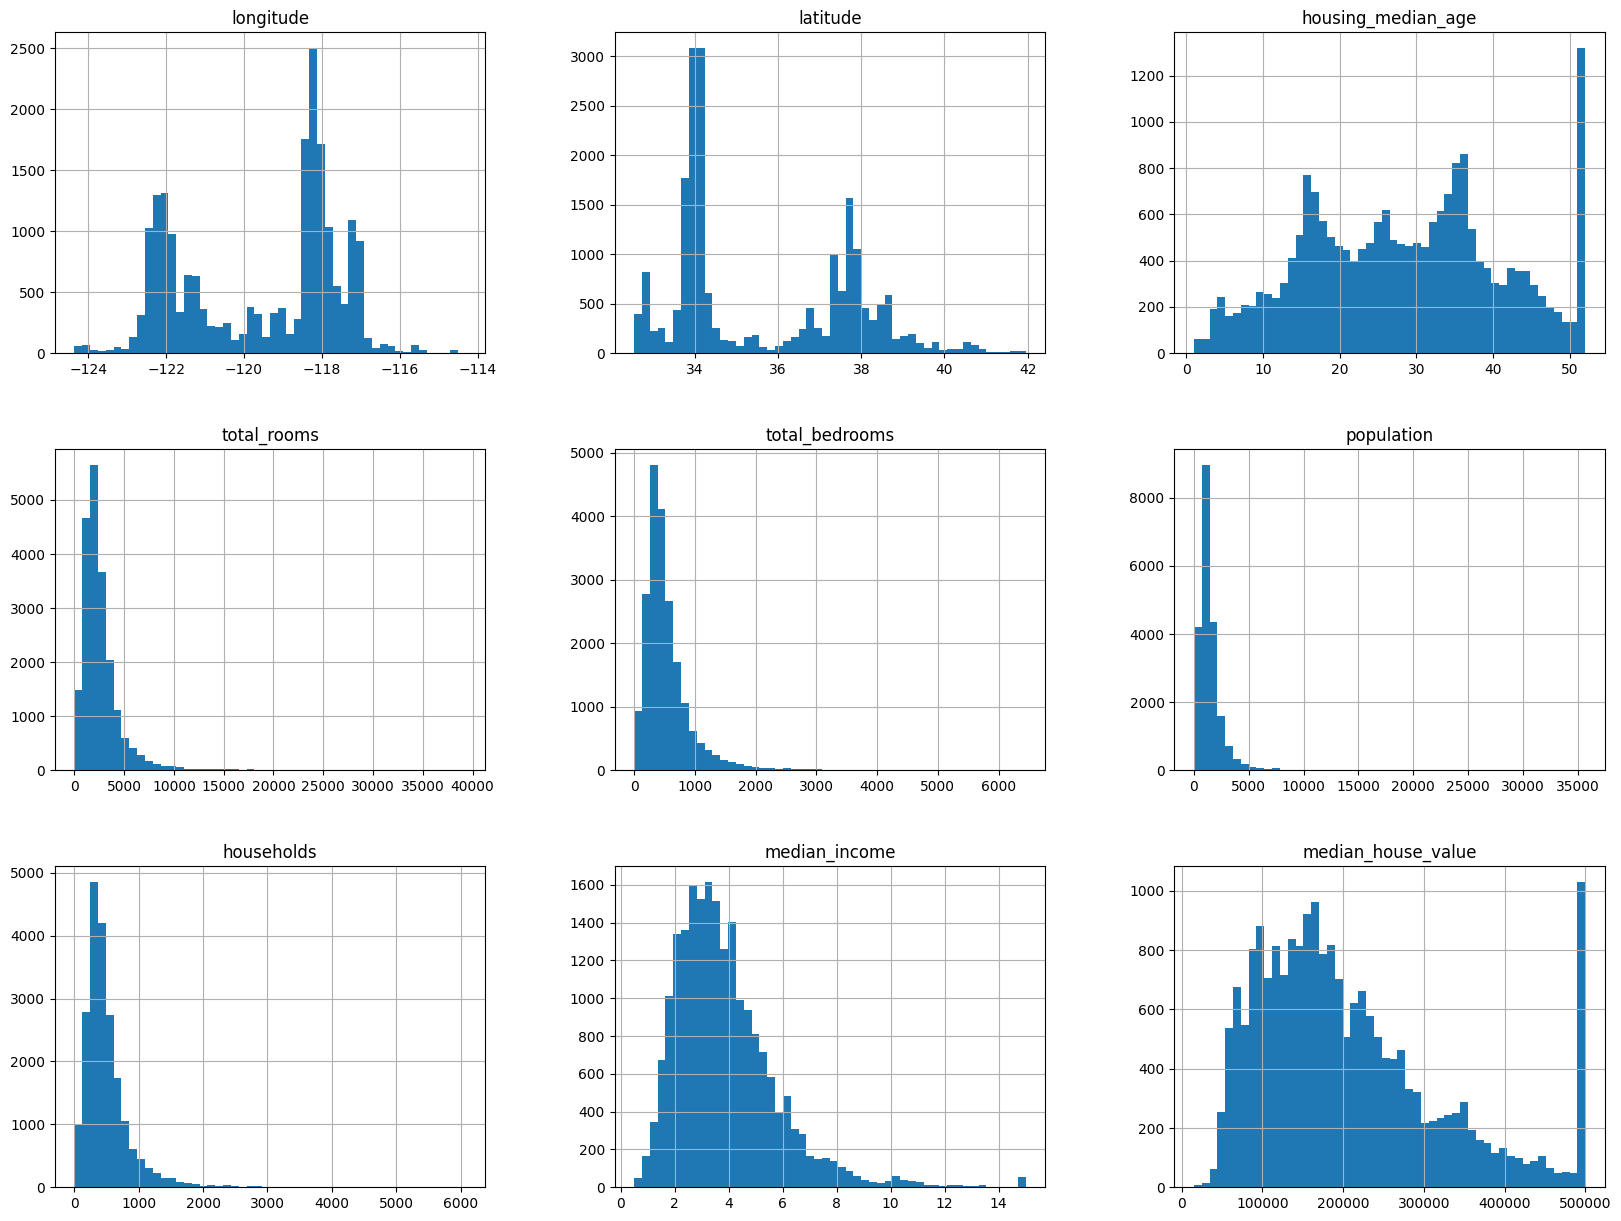

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt   #Plotting histograms for each numerical attribute

housing.hist(bins=50, figsize=(20,15))

plt.show()

In [8]:
# We remark that 'median_house_values' and 'housing_median_age' are capped
# Range of values differ for each column
# 'median_income' values are capped and scaled

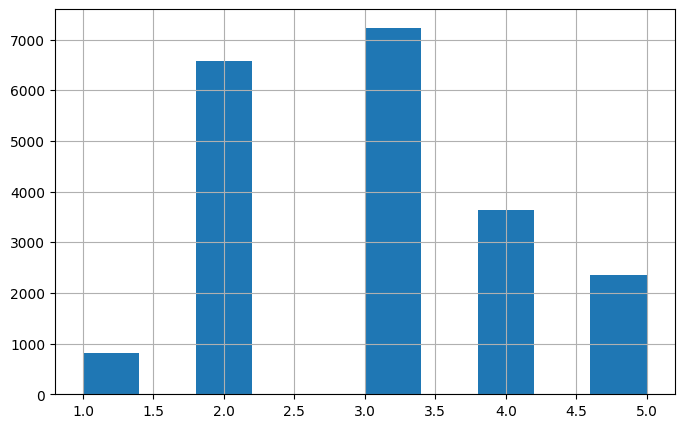

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


In [9]:
# Dividing the dataframe in training and testing sets based on 'median_income':

import numpy as np

housing["income_cat"] = pd.cut(housing['median_income'],                  #creating a new column that describes
                              bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],    #the income category of a person
                              labels=[1,2,3,4,5])

housing["income_cat"].hist(figsize=(8,5))
plt.show()

print(housing["income_cat"].value_counts())

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

splitIndices = StratifiedShuffleSplit(n_splits=1,
                                      test_size=0.2,
                                      random_state=42)

for train_index, test_index in splitIndices.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# print(housing["income_cat"].value_counts()/len(housing)*100)                       # checking if the 3 datasets now
# print()                                                                            # have the same proportion
# print(strat_train_set["income_cat"].value_counts()/len(strat_train_set)*100)       
# print()
# print(strat_test_set["income_cat"].value_counts()/len(strat_test_set)*100)

In [11]:
strat_train_set.drop("income_cat", axis=1, inplace=True)

strat_test_set.drop("income_cat", axis=1, inplace=True)

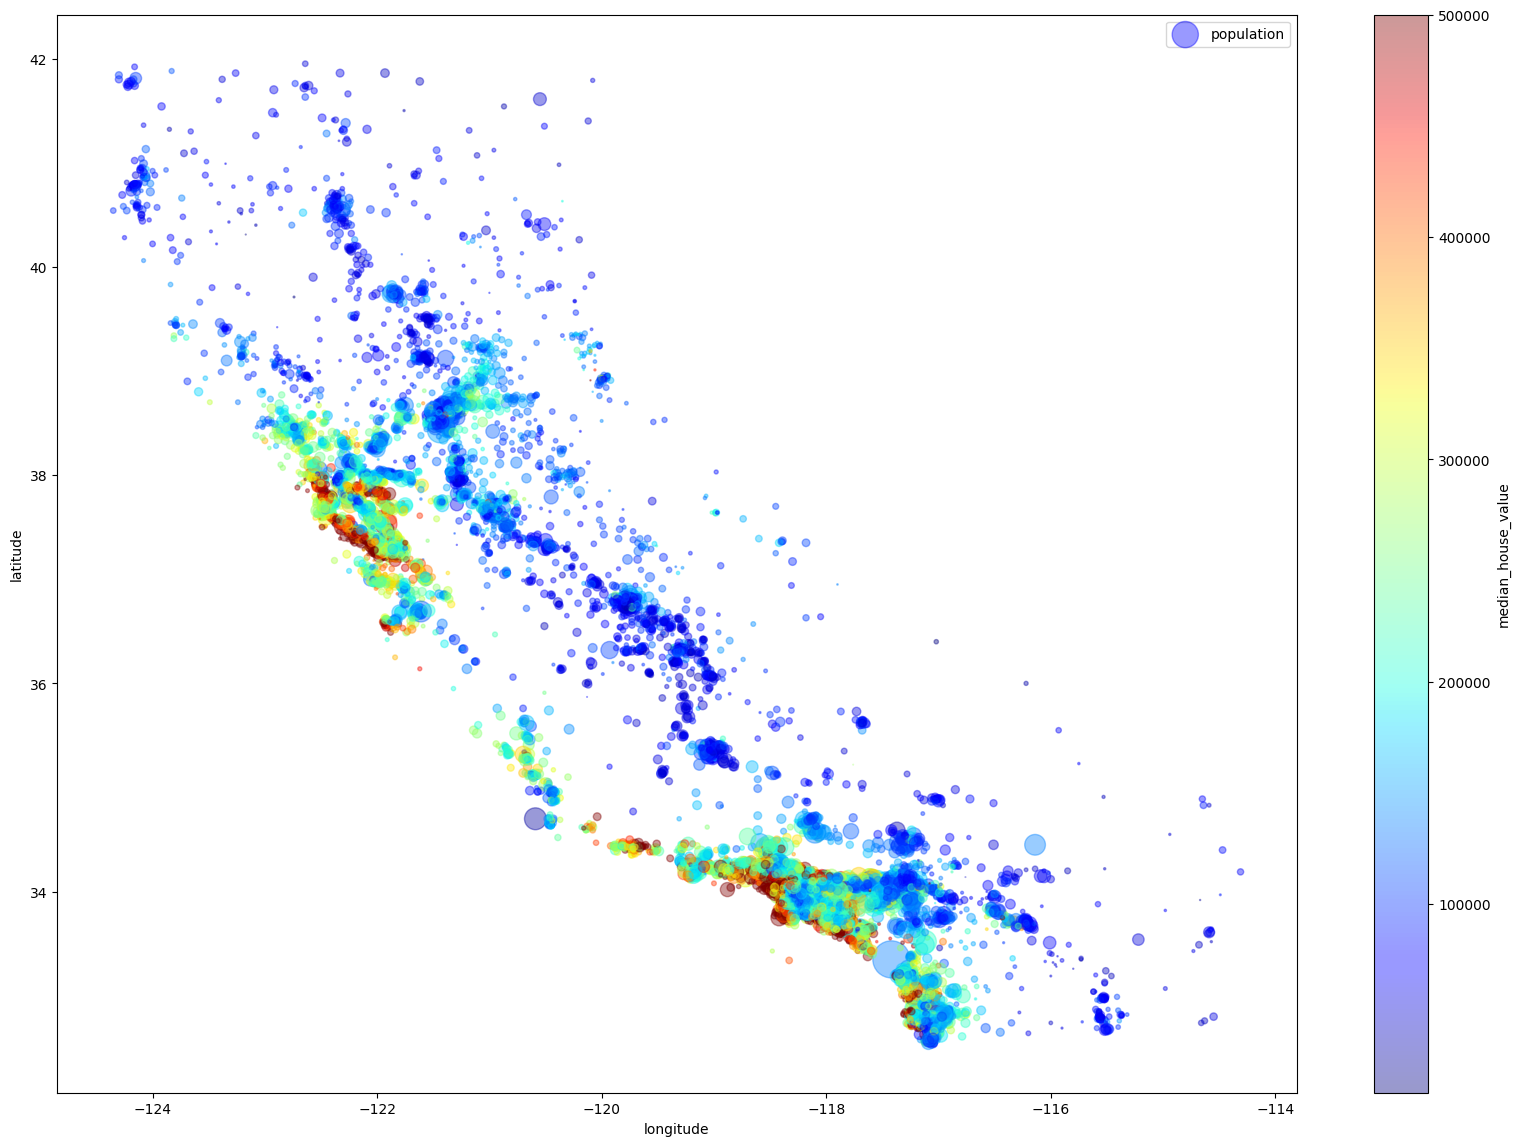

In [12]:
housing = strat_train_set.copy()   #making a copy in order not to destroy original train set

housing.plot(kind="scatter",
             x="longitude",y='latitude',
             figsize=(20,14),
             alpha=0.4,
             s=housing['population']/50,
             label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.show()

In [13]:
corr_matrix = housing.corr(numeric_only=True)   #Noticing the correlation of the atributes
corr_matrix                                     #using the Pearson coefficient matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [14]:
corr_matrix["median_house_value"].sort_values(ascending=True)   

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

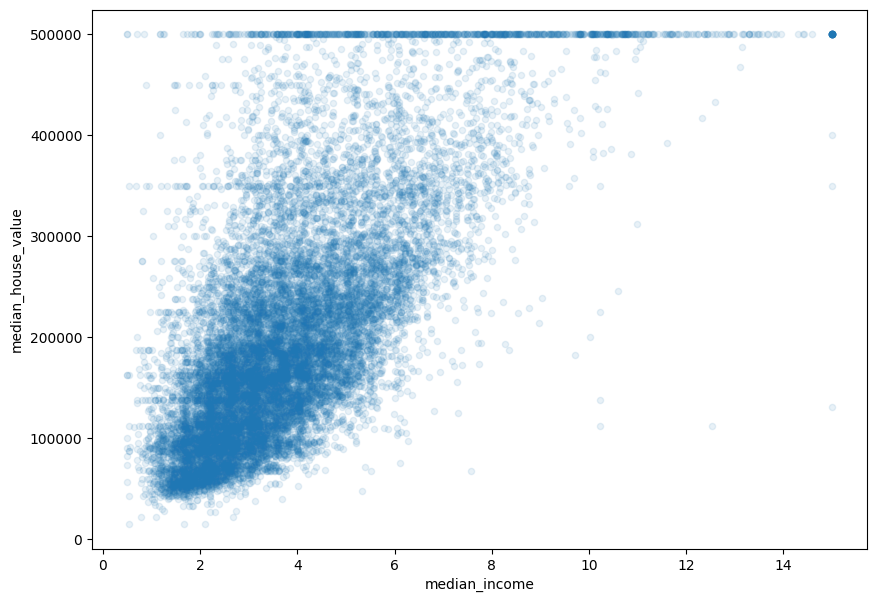

In [15]:
housing.plot(kind='scatter',
             x='median_income',
             y='median_house_value',
             alpha=0.1,
             figsize=(10,7))

In [16]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

housing['bedrooms_per_room'] = housing["total_bedrooms"] / housing["total_rooms"]

housing["population_per_household"] = housing["population"] / housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [17]:
corr_matrix = housing.corr(numeric_only=True)                      #reanalyzing Pearson Coefficient Matrix

corr_matrix["median_house_value"].sort_values(ascending = True)

bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [18]:
housing = strat_train_set.drop("median_house_value", axis=1)      #creating a new copy of the training set, without the labels

housing_labels = strat_train_set["median_house_value"].copy()     #crating the labels set

In [19]:
from sklearn.impute import SimpleImputer    # using SimpleImputer for dealing with the missing values

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)                    #finding the median for each attribute column

print(imputer.statistics_)  
print(housing_num.columns)

X = imputer.transform(housing_num)          #replaces NA with median; returns a numPy instead of DF

np.set_printoptions(suppress=True)
print(f"X:\n {X} \n")

housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)
print(housing_tr)

print(housing_tr.isna().sum())

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
X:
 [[-121.46     38.52     29.     ... 2237.      706.        2.1736]
 [-117.23     33.09      7.     ... 2015.      768.        6.3373]
 [-119.04     35.37     44.     ...  667.      300.        2.875 ]
 ...
 [-122.72     38.44     48.     ...  458.      172.        3.1797]
 [-122.7      38.31     14.     ... 1208.      501.        4.1964]
 [-122.14     39.97     27.     ...  625.      197.        3.1319]] 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     3

In [20]:
housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OneHotEncoder        #For converting the "ocean_proximity" column to binary values

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print('1-hot Sparse matrix:\n', housing_cat_1hot[:10,:], '\n')    #location of "1" in 1hot Matrix

print(housing_cat_1hot.toarray()[:10], '\n')                     #1hot Matrix as numPy

print(cat_encoder.categories_)

1-hot Sparse matrix:
   (np.int32(0), np.int32(1))	1.0
  (np.int32(1), np.int32(4))	1.0
  (np.int32(2), np.int32(1))	1.0
  (np.int32(3), np.int32(4))	1.0
  (np.int32(4), np.int32(0))	1.0
  (np.int32(5), np.int32(3))	1.0
  (np.int32(6), np.int32(0))	1.0
  (np.int32(7), np.int32(0))	1.0
  (np.int32(8), np.int32(0))	1.0
  (np.int32(9), np.int32(0))	1.0 

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room


    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]
        






In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([

    ("imputer",SimpleImputer(strategy="median")),

    ("attribs_adder",CombinedAttributesAdder()),
    
    ("std_scaler", StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

print(housing_num.head(), '\n')

print(housing_num_tr[:6, :].round(2))


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964   

[[-0.94  1.35  0.03  0.58  0.64  0.73  0.56 -0.89  0.02  0.01 -0.12]
 [ 1.17 -1.19 -1.72  1.26  0.78  0.53  0.72  1.29  0.57 -0.04 -0.81]
 [ 0.27 -0.13  1.22 -0.47 -0.55 -0.67 -0.52 -0.53 -0.02 -0.08 -0.34]
 [ 1.22 -1.35 -0.37 -0.35 -0.04 -0

In [23]:
from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])

housing_prepared = full_pipeline.fit_transform(housing)

np.set_printoptions(edgeitems=10,
                    linewidth=600,
                    precision=3,
                    suppress=True)

print(housing_prepared[:6, :])        #final array that will be used for training

np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
                    suppress=False, threshold=1000, formatter=None)


[[-0.941  1.347  0.028  0.585  0.64   0.733  0.556 -0.894  0.017  0.006 -0.121  0.     1.     0.     0.     0.   ]
 [ 1.172 -1.192 -1.722  1.261  0.782  0.534  0.721  1.292  0.569 -0.041 -0.811  0.     0.     0.     0.     1.   ]
 [ 0.268 -0.126  1.22  -0.47  -0.545 -0.675 -0.524 -0.525 -0.018 -0.075 -0.338  0.     1.     0.     0.     0.   ]
 [ 1.222 -1.351 -0.37  -0.349 -0.036 -0.468 -0.037 -0.866 -0.595 -0.107  0.961  0.     0.     0.     0.     1.   ]
 [ 0.437 -0.636 -0.131  0.427  0.273  0.374  0.221  0.326  0.251  0.006 -0.475  1.     0.     0.     0.     0.   ]
 [-1.231  1.085 -0.052 -0.662 -0.686 -0.624 -0.652 -0.094 -0.249 -0.019 -0.075  0.     0.     0.     1.     0.   ]]


In [24]:
#Training the model - Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared,
            housing_labels)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)        #68627.8739 - too large; the model UNDERFITS the training data

68627.87390018745


In [25]:
#Training the model - DecissionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)

tree_rmse = np.sqrt(tree_mse)

print(tree_rmse)      #0  -  the model OVERFITS the training data


0.0


In [28]:
#Training the model - K-fold cross-validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,
                         housing_prepared,
                         housing_labels,
                         scoring = "neg_mean_squared_error",
                         cv=10)

tree_rmse_scores = np.sqrt(-scores)

print("Scores: ", tree_rmse_scores.round(0))
print("Mean of scores: ", tree_rmse_scores.mean().round(0))
print("Scores' std deviation: ", tree_rmse_scores.std().round(0))

Scores:  [72831. 69973. 69529. 72518. 69146. 79095. 68960. 73345. 69826. 71077.]
Mean of scores:  71630.0
Scores' std deviation:  2914.0


In [30]:
scores = cross_val_score(lin_reg,
                         housing_prepared,
                         housing_labels,
                         scoring = "neg_mean_squared_error",
                         cv=10)

lin_rmse_scores = np.sqrt(-scores)

print("Scores: ", lin_rmse_scores.round(0))
print("Mean: ", lin_rmse_scores.mean().round(0))
print("Std: ", lin_rmse_scores.std().round(0))

Scores:  [71763. 64115. 67771. 68635. 66846. 72528. 73997. 68802. 66443. 70140.]
Mean:  69104.0
Std:  2880.0


In [33]:
#Training the model - Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_predictions, housing_labels)

forest_rmse = np.sqrt(forest_mse)

print(forest_rmse.round(0))

18651.0


In [34]:
forest_scores = cross_val_score(forest_reg,
                                housing_prepared,
                                housing_labels,
                                scoring="neg_mean_squared_error",
                                cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores: ", forest_rmse_scores.round(0))
print("Mean: ", forest_rmse_scores.mean().round(0))
print("Std: ", forest_rmse_scores.std().round(0))


Scores:  [51560. 48738. 47211. 51875. 47578. 51863. 52746. 50065. 48665. 54056.]
Mean:  50436.0
Std:  2203.0


In [36]:
final_model = forest_reg

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(final_predictions, y_test)
final_rmse = np.sqrt(final_mse)

print(final_rmse.round(0))



48374.0
